<a href="https://colab.research.google.com/github/talentrics/NWU_MSDS422_Assignments/blob/master/Assignment6_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MSDS 422 Assignment #6 - Artificial Neural Networks

**by Daniel Macdonald @talentrics**

**Description**

This is the 6th assignment in NWU MSDS 422 - Practical Machine Learning

**text:** 

Initial source code from Aurelien Geron 'Machine Learning with SciKit Learn' Ch. 10
https://github.com/ageron/handson-ml

**Data Source (MNIST data set in TensorFlow)** - 
tf.keras.datasets.mnist.load_data()

**CoLab Shared Link - this notebook **

https://colab.research.google.com/drive/1C0vGy2ANuZu8ZSevwag1ydboKfS1JmMc

**GitHub Repository **

https://github.com/talentrics/NWU_MSDS422_Assignments

**Table of contents:**

* System & Data Setup
* Model 2a - 2 layer model - 10 neurons per layer
* Model 2a - 2 layer model - mixed neurons per layer
* Model 2a - 2 layer model - 20 neurons per layer
* Model 2a - 2 layer model - mixed neurons per layer
* Conclusion

## System & data Setup

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

#suppress tf.logging
import logging
logging.getLogger('tensorflow').disabled = True

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [0]:
import tensorflow as tf
import numpy as np

In [0]:
#split train & test data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

In [37]:
#test split 'train'
X_train.shape

(60000, 784)

In [38]:
#test split 'test'
X_test.shape

(10000, 784)

Training data shape (60000, 784)


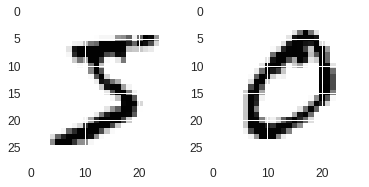

In [65]:
#check data in training set as visual:
print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(28, 28), cmap=plt.cm.Greys);
ax2.imshow(X_train[1].reshape(28, 28), cmap=plt.cm.Greys);

## Model 2a - 2 layer model with 10 Neurons each layer

**Evaluation Criteria: **

* Time to build: 100 s
* Accuracy (Train): .94
* Accuracy (Test):  .93

In [40]:
#Model 2a - 2D with 10 Neurons each layer
%%time
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf_2a = tf.estimator.DNNClassifier(hidden_units=[10,10], n_classes=10,
                                     feature_columns=feature_cols)

input_fn_2a = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=50, batch_size=50, shuffle=True)
dnn_clf_2a.train(input_fn=input_fn_2a)

CPU times: user 2min 33s, sys: 7.56 s, total: 2min 41s
Wall time: 1min 40s


In [43]:
#evaluate training accuracy (2a)
train_2a_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, shuffle=False)
eval_results_train_2a = dnn_clf_2a.evaluate(input_fn=train_2a_input_fn)
eval_results_train_2a

{'accuracy': 0.9435,
 'average_loss': 0.20028083,
 'global_step': 60000,
 'loss': 25.62228}

In [44]:
#evaluate test accuracy (2a)
test_2a_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results_test_2a = dnn_clf_2a.evaluate(input_fn=test_2a_input_fn)
eval_results_test_2a

{'accuracy': 0.9328,
 'average_loss': 0.2443137,
 'global_step': 60000,
 'loss': 30.925785}

## Model 2b - 2 layer model with mixed neurons each layer

**Evaluation Criteria: **

* Time to build: 184 s
* Accuracy (Train): .94
* Accuracy (Test):  .979

In [57]:
#Model 2b - 2D with 50 Neurons each layer
%%time
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf_2b = tf.estimator.DNNClassifier(hidden_units=[150,50], n_classes=10,
                                     feature_columns=feature_cols)

input_fn_2b = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=50, batch_size=50, shuffle=True)
dnn_clf_2b.train(input_fn=input_fn_2b)

CPU times: user 4min 34s, sys: 11.5 s, total: 4min 45s
Wall time: 3min 4s


In [58]:
#evaluate training accuracy (2b)
train_2b_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, shuffle=False)
eval_results_train_2b = dnn_clf_2a.evaluate(input_fn=train_2b_input_fn)
eval_results_train_2b

{'accuracy': 0.9435,
 'average_loss': 0.20028083,
 'global_step': 60000,
 'loss': 25.62228}

In [59]:
#evaluate test accuracy (2b)
test_2b_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results_test_2b = dnn_clf_2b.evaluate(input_fn=test_2a_input_fn)
eval_results_test_2b

{'accuracy': 0.9791,
 'average_loss': 0.095086426,
 'global_step': 60000,
 'loss': 12.036257}

## Model 5a - 5 layer model with 20 Neurons each layer
**Evaluation Criteria:**
* Time to build: 184 s
* Accuracy (Train): .96
* Accuracy (Test): .94

In [60]:
#Model 5a - 5D with 20 Neurons each layer
%%time
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf_5a = tf.estimator.DNNClassifier(hidden_units=[20,20,20,20,20], n_classes=10,
                                     feature_columns=feature_cols)

input_fn_5a = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=50, batch_size=50, shuffle=True)
dnn_clf_5a.train(input_fn=input_fn_5a)

CPU times: user 3min 4s, sys: 9.28 s, total: 3min 13s
Wall time: 2min 1s


In [61]:
#evaluate training accuracy (5a)
train_5a_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, shuffle=False)
eval_results_train_5a = dnn_clf_5a.evaluate(input_fn=train_5a_input_fn)
eval_results_train_5a

{'accuracy': 0.96585,
 'average_loss': 0.11125535,
 'global_step': 60000,
 'loss': 14.233093}

In [62]:
#evaluate test accuracy (5a)
test_5a_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results_test_5a = dnn_clf_5a.evaluate(input_fn=test_5a_input_fn)
eval_results_test_5a

{'accuracy': 0.9477,
 'average_loss': 0.20187175,
 'global_step': 60000,
 'loss': 25.553387}

## Model 5b - 5 layer model with mixed neurons each layer
**Evaluation Criteria:**
* Time to build: 305 s
* Accuracy (Train): 1.0
* Accuracy (Test): .975

In [54]:
#Model 5b - 5D with Mixed Neurons each layer (300,200,100,50,25)
%%time
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf_5b = tf.estimator.DNNClassifier(hidden_units=[300,200,100,50,25], n_classes=10,
                                     feature_columns=feature_cols)

input_fn_5b = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=50, batch_size=50, shuffle=True)
dnn_clf_5b.train(input_fn=input_fn_5b)

CPU times: user 7min 56s, sys: 27.6 s, total: 8min 24s
Wall time: 5min 5s


In [55]:
#evaluate training accuracy (5a)
train_5b_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, shuffle=False)
eval_results_train_5b = dnn_clf_5b.evaluate(input_fn=train_5b_input_fn)
eval_results_train_5b

{'accuracy': 1.0,
 'average_loss': 4.077159e-05,
 'global_step': 60000,
 'loss': 0.0052159815}

In [56]:
#evaluate test accuracy (5a)
test_5b_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results_test_5b = dnn_clf_5b.evaluate(input_fn=test_5b_input_fn)
eval_results_test_5b

{'accuracy': 0.9757,
 'average_loss': 0.22292946,
 'global_step': 60000,
 'loss': 28.21892}

## Conclusion

Recommendation to select model 5b - although it takes much longer to build, the accuracy is significantly higher (.975)